# Introduction
Hi!
My name is Azário Cossa, and I am going to build a multiple regression model in order to show that I understood all the ICT4Devz 2nd Edition lessons on Data Mining, and by that show that I deserve to be certificated.
I hope you like it ;)  .

# DataSet and description
My work will all be on a dataset I found in UCI repositories by the  name of 'Combined Cycle Power Plant' in which I have basically create a model that can predict by four atributes (which we'll see in the description), a fifth value, that is the net hourly electrical energy output (EP)  of the plant.

Ambient Temperature (AT)
Ambient Pressure (AP)
Relative Humidity (RH)
Exhaust Vacuum (V)
Net hourly electrical energy output (EP)

# DataSet description by the dataset donner
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.
We provide the data both in .ods and in .xlsx formats.

# LET'S START PROGRAMMING

In [1]:
# Import the libraries

#libraries to handle data
import pandas as pd
import numpy as np
import math

#library to split the data into train and test sets
from sklearn.model_selection import train_test_split

#library to create, train and evaluate the model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn import linear_model
from sklearn.metrics import r2_score

#library to make plot
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [15]:
# import dataset
#Here is where we will import the dataset
dataset=pd.read_csv('E:/My Office/Data Science/Data Mining/Datasets/CCPP/Folds5x2_pp.csv')

In [16]:
#In order to see if the dataset was correctly imported we must use the function head
dataset.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Defining our dependant and undependant variables (x and y)
To define theese variables it's important to know that the x, as an undependant variable, is defined by all the features that are not meant to be predicted(AT, V, AP, RH). And the y, as a dependant variable is defined by the values of the predicting values (PE in  this case).

In [55]:
x=dataset.drop(['PE'], axis=1).values
y=dataset['PE'].values

In [56]:
#Optional commands can be used to verify if x and y are both well defined
print ('===Values of x===')
print(x)
print()
print('===Now the values of y===')
print ()
print(y)

===Values of x===
[[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 ...
 [  15.99   43.34 1014.2    78.66]
 [  17.65   59.87 1018.58   94.65]
 [  23.68   51.3  1011.86   71.24]]

===Now the values of y===

[480.48 445.75 438.76 ... 465.96 450.93 451.67]


# Data split
As we all know, when building a model we must have the data for building it, AND  the data for testing it it, because if we only used that data for building/training, then how would we know if our model works, how would we test it? And if all the data was used for testing, we wouldn't have a model to test. So in order to prevent both pf these situations I've decided to split my dataset (which contains almost 10.000 samples) in two parts, 75% for training and 25% for testing.

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# Model Training on the DataSet
Up until now, we've already got the dataset, which is already split into TRAINING and TEST sets, and all the libraries already imported, so what we need is to create and train a model, which is an important part in all this.

In [58]:
model=LinearRegression()
model.fit(x_train,y_train)
print(model.coef_)
print (model.intercept_)

[-1.98357941 -0.23219575  0.06559288 -0.15932893]
451.1909593525062


# Predict test results
Some explanations

In [59]:
y_pred=model.predict(x_test)
print(y_pred)

[433.33404296 448.36262204 445.91904247 ... 474.5913693  463.59555113
 428.08253171]


# Relationship Analysis

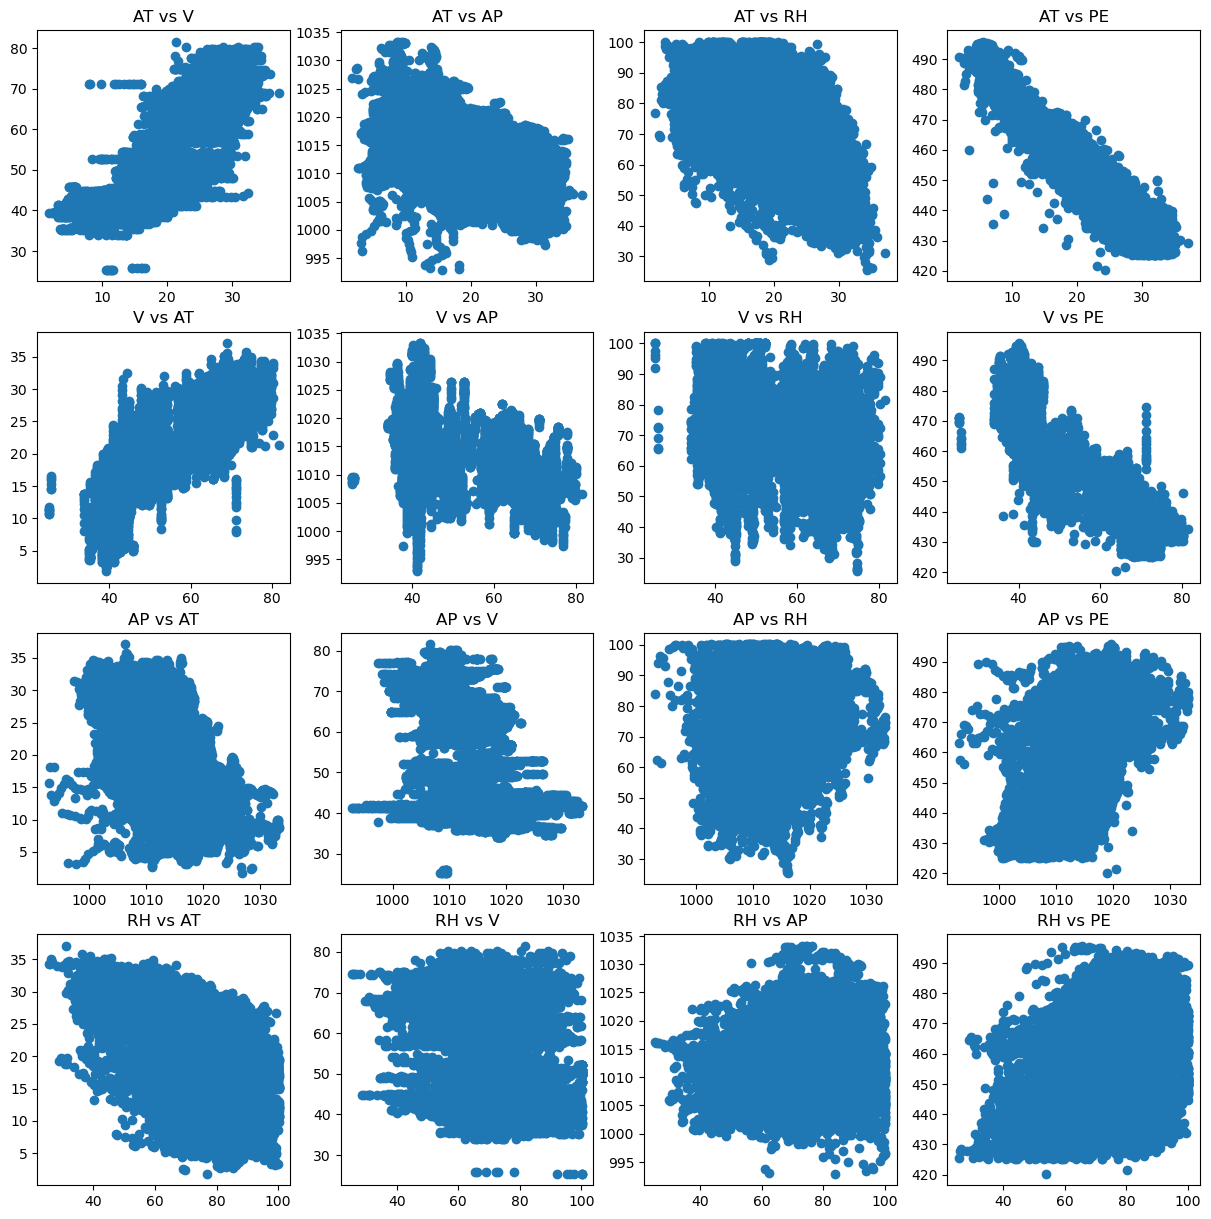

In [88]:
figure, axis = plt.subplots(4, 4, figsize=(15,15))

#Relation with AT
axis[0, 0].scatter(dataset['AT'].values, dataset['V'].values)
axis[0, 0].set_title("AT vs V")
  
axis[0, 1].scatter(dataset['AT'].values, dataset['AP'].values)
axis[0, 1].set_title("AT vs AP")

axis[0, 2].scatter(dataset['AT'].values, dataset['RH'].values)
axis[0, 2].set_title("AT vs RH")

axis[0, 3].scatter(dataset['AT'].values, dataset['PE'].values)
axis[0, 3].set_title("AT vs PE")


#Relation with V
axis[1, 0].scatter(dataset['V'].values, dataset['AT'].values)
axis[1, 0].set_title("V vs AT")

axis[1, 1].scatter(dataset['V'].values, dataset['AP'].values)
axis[1, 1].set_title("V vs AP")

axis[1, 2].scatter(dataset['V'].values, dataset['RH'].values)
axis[1, 2].set_title("V vs RH")

axis[1, 3].scatter(dataset['V'].values, dataset['PE'].values)
axis[1, 3].set_title("V vs PE")


#Relation with AP
axis[2, 0].scatter(dataset['AP'].values, dataset['AT'].values)
axis[2, 0].set_title("AP vs AT")

axis[2, 1].scatter(dataset['AP'].values, dataset['V'].values)
axis[2, 1].set_title("AP vs V")

axis[2, 2].scatter(dataset['AP'].values, dataset['RH'].values)
axis[2, 2].set_title("AP vs RH")

axis[2, 3].scatter(dataset['AP'].values, dataset['PE'].values)
axis[2, 3].set_title("AP vs PE")


#Relation with RH
axis[3, 0].scatter(dataset['RH'].values, dataset['AT'].values)
axis[3, 0].set_title("RH vs AT")

axis[3, 1].scatter(dataset['RH'].values, dataset['V'].values)
axis[3, 1].set_title("RH vs V")

axis[3, 2].scatter(dataset['RH'].values, dataset['AP'].values)
axis[3, 2].set_title("RH vs AP")

axis[3, 3].scatter(dataset['RH'].values, dataset['PE'].values)
axis[3, 3].set_title("RH vs PE")
  
# Combine all the graphs and display
plt.show()

Text(0.5, 1.0, 'Relation (AT vs EP)')

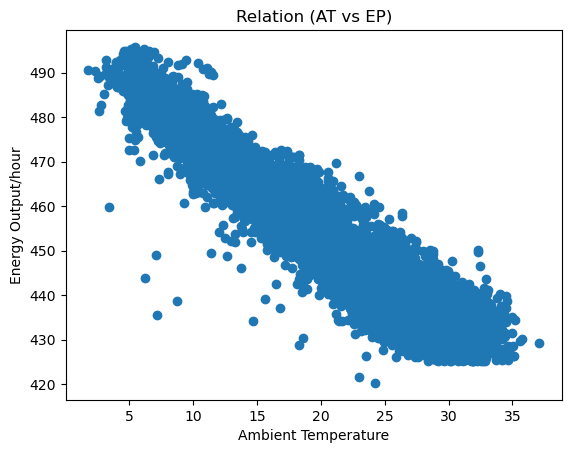

In [83]:
plt.scatter(dataset['AT'].values,dataset['PE'].values)
plt.xlabel('Ambient Temperature')
plt.ylabel('Energy Output/hour')
plt.title('Relation (AT vs EP)')

#We can here see that the higher the Ambiente Temperature, thhe lower the Net Energy Output per hour, which says that high
#temperatures have negative impact in the energy production

Text(0.5, 1.0, 'Relation (V vs PE)')

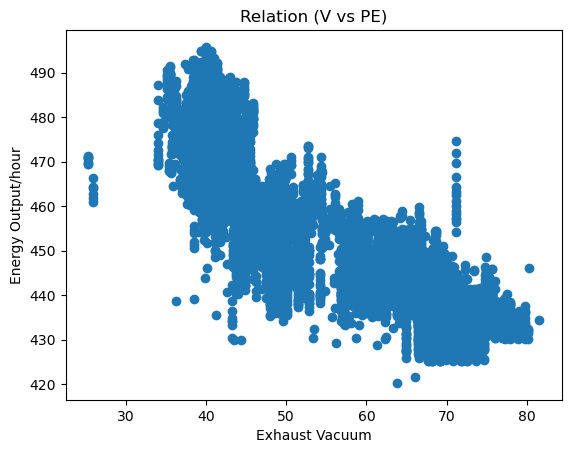

In [63]:
plt.scatter(dataset['V'].values,dataset['PE'].values)
plt.xlabel('Exhaust Vacuum')
plt.ylabel('Energy Output/hour')
plt.title('Relation (V vs PE)')
#We can here see that the higher the Exhaust Vacuum, the lower the Net Energy Output per hour, which says that high
#Exhaust Vacuum values have negative impact in the energy production but in a  much smoother way.

Text(0.5, 1.0, 'Relation (AP vs PE)')

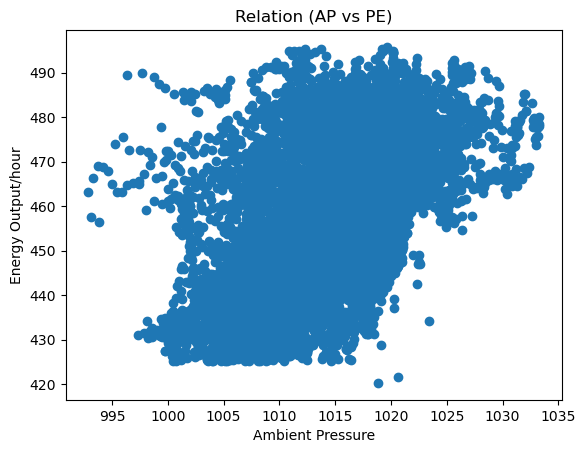

In [64]:
plt.scatter(dataset['AP'].values,dataset['PE'].values)
plt.xlabel('Ambient Pressure')
plt.ylabel('Energy Output/hour')
plt.title('Relation (AP vs PE)')

#We can here see that the higher the Ambient Pressure, the higher the Net Energy Output per hour, which says that high
#have positive impact in the energy production but in smal rate.

Text(0.5, 1.0, 'Relation (RH vs PE)')

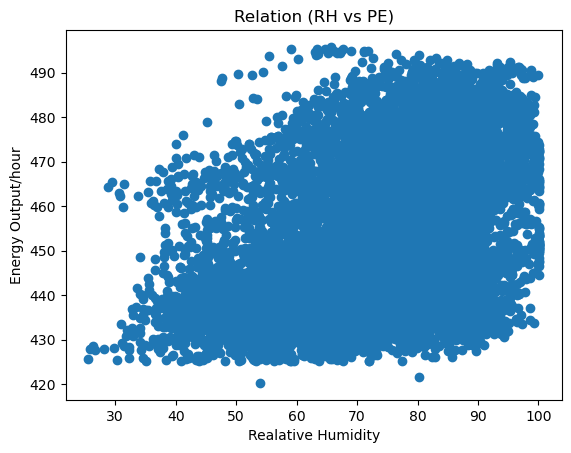

In [65]:
plt.scatter(dataset['RH'].values,dataset['PE'].values)
plt.xlabel('Realative Humidity')
plt.ylabel('Energy Output/hour')
plt.title('Relation (RH vs PE)')

#We can here see that the higher the Relative Humidity, the higher the Net Energy Output per hour, which says that high
#have positive impact in the energy production in a more shaped way.

# Model Evaluation
Some explanation

In [66]:
r2_score(y_test,y_pred)

0.9294064964520519

In [67]:
model.score(x_train,y_train)

0.9284509042654366

In [68]:
model.score(x_test,y_pred)

1.0

# Ploting the results
Some description

Text(0.5, 1.0, 'Tested vs Predicted values')

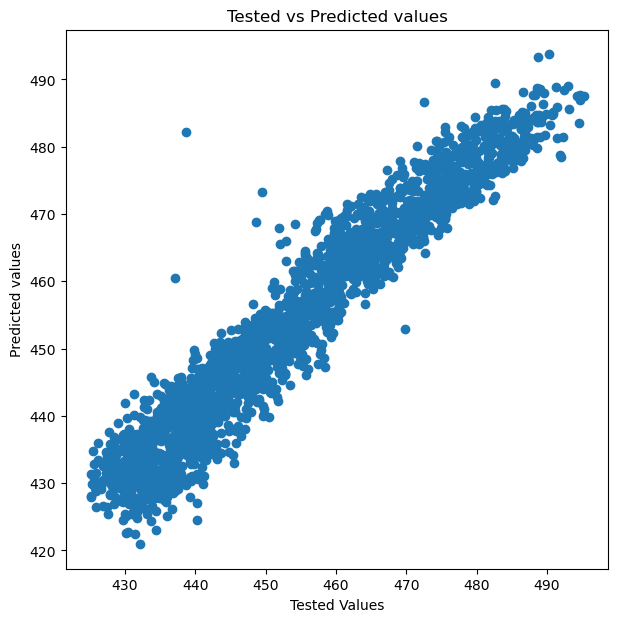

In [69]:
plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred)
plt.xlabel('Tested Values')
plt.ylabel('Predicted values')
plt.title('Tested vs Predicted values')


In [71]:
print(model.coef_)
print(model.intercept_)

[-1.98357941 -0.23219575  0.06559288 -0.15932893]
451.1909593525062


# Analyzing the predicted values
Some comments

In [72]:
pred_y_df=pd.DataFrame({'Real Value':y_test,'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:30]

,Real Value,Predicted Value,Difference
0,426.18,433.334043,-7.154043
1,451.10,448.362622,2.737378
2,442.87,445.919042,-3.049042
3,443.70,445.968740,-2.268740
4,460.59,462.831189,-2.241189
5,438.00,440.809339,-2.809339
6,484.31,482.730968,1.579032
7,464.18,462.249645,1.930355
8,452.53,451.260596,1.269404
9,445.54,445.440696,0.099304


In [77]:
print(model.coef_)
print('')
print(model.intercept_)

[ 0.00000000e+00 -5.86827173e+00 -2.95152189e+00  1.56380646e+01
  4.09323406e+00  1.59324371e-02  1.26142482e-02  3.22997588e-03
 -7.06194295e-03 -1.36728979e-03  2.45140439e-03  9.48825801e-04
 -7.61221143e-03 -3.76971757e-03 -2.10743929e-03]

-7518.264319543942


# Last things
With the model done and trained, and with the patterns identified, I can now finish of with the given task.
I have to say that this project was not easy, and worse for me that am only in the second year of Computer Engineering, but I am happy of having done it and if there is something I can do to improve it, please do not hesutate in telling me so that I can be a better professional in the area of Data Science.